# How to visualize multi-dimentional data?
1. Scatter Matrix
2. Heatmaps and Correlation plots
3. 2D Histograms
4. Contur plots
5. KDE plots

In [2]:
# to print multiple line in one block of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# import librries and datasets, visulizing first row
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv('Diabetes.csv')
df_hw = pd.read_csv('height_weight.csv')

df_diabetes.head(1)
df_hw.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


,sex,height,weight
0,1,71.74,259.88


In [4]:
# exclude 2 columns from dataset before 0 imputation and removal
cols = [i for i in df_diabetes.columns if i not in ['Pregnancies', 'Outcome']]
print(cols)

df1 = df_diabetes.copy()

# replace 0 with Not a Nomber (NaN) and drop them
df1[cols] = df1[cols].replace(0, np.nan)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## 1. Scatter Matrix

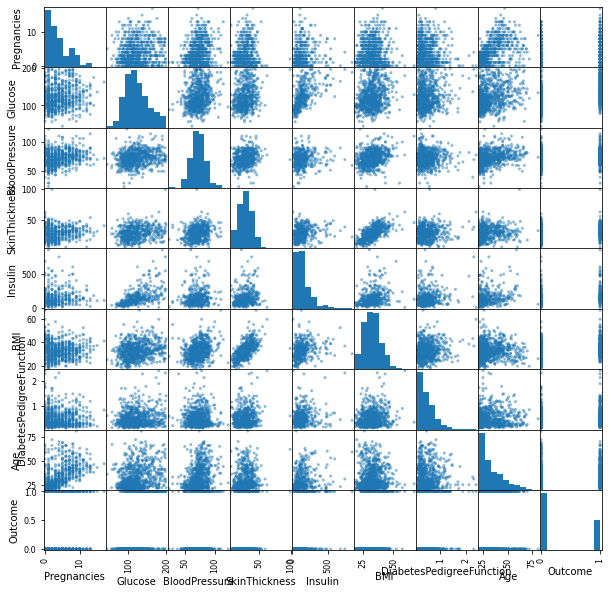

In [5]:
# the band data (col1 of plot) is integer data
pd.plotting.scatter_matrix(df1, figsize=(10, 10));

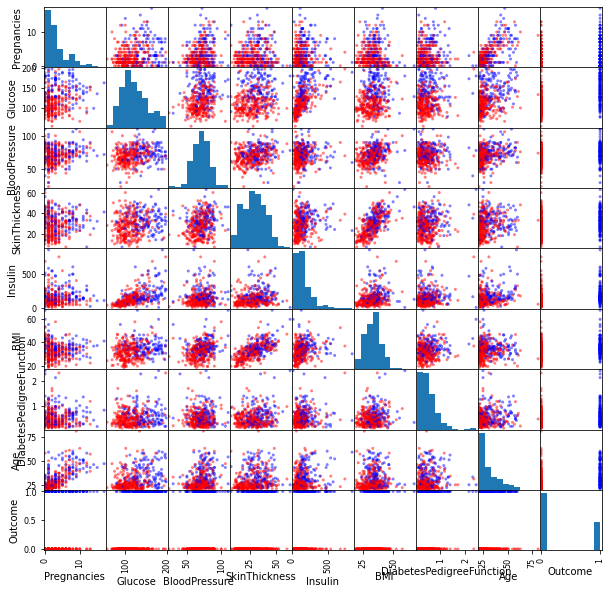

In [6]:
# visualiz data with overlaying colours
# you can see correlation based on outcome of a single marker (i.e. BMI, Glucose)
df2 = df1.dropna()
colours = df2['Outcome'].map(lambda x: 'b' if x else 'r')
pd.plotting.scatter_matrix(df2, figsize=(10, 10), color=colours);

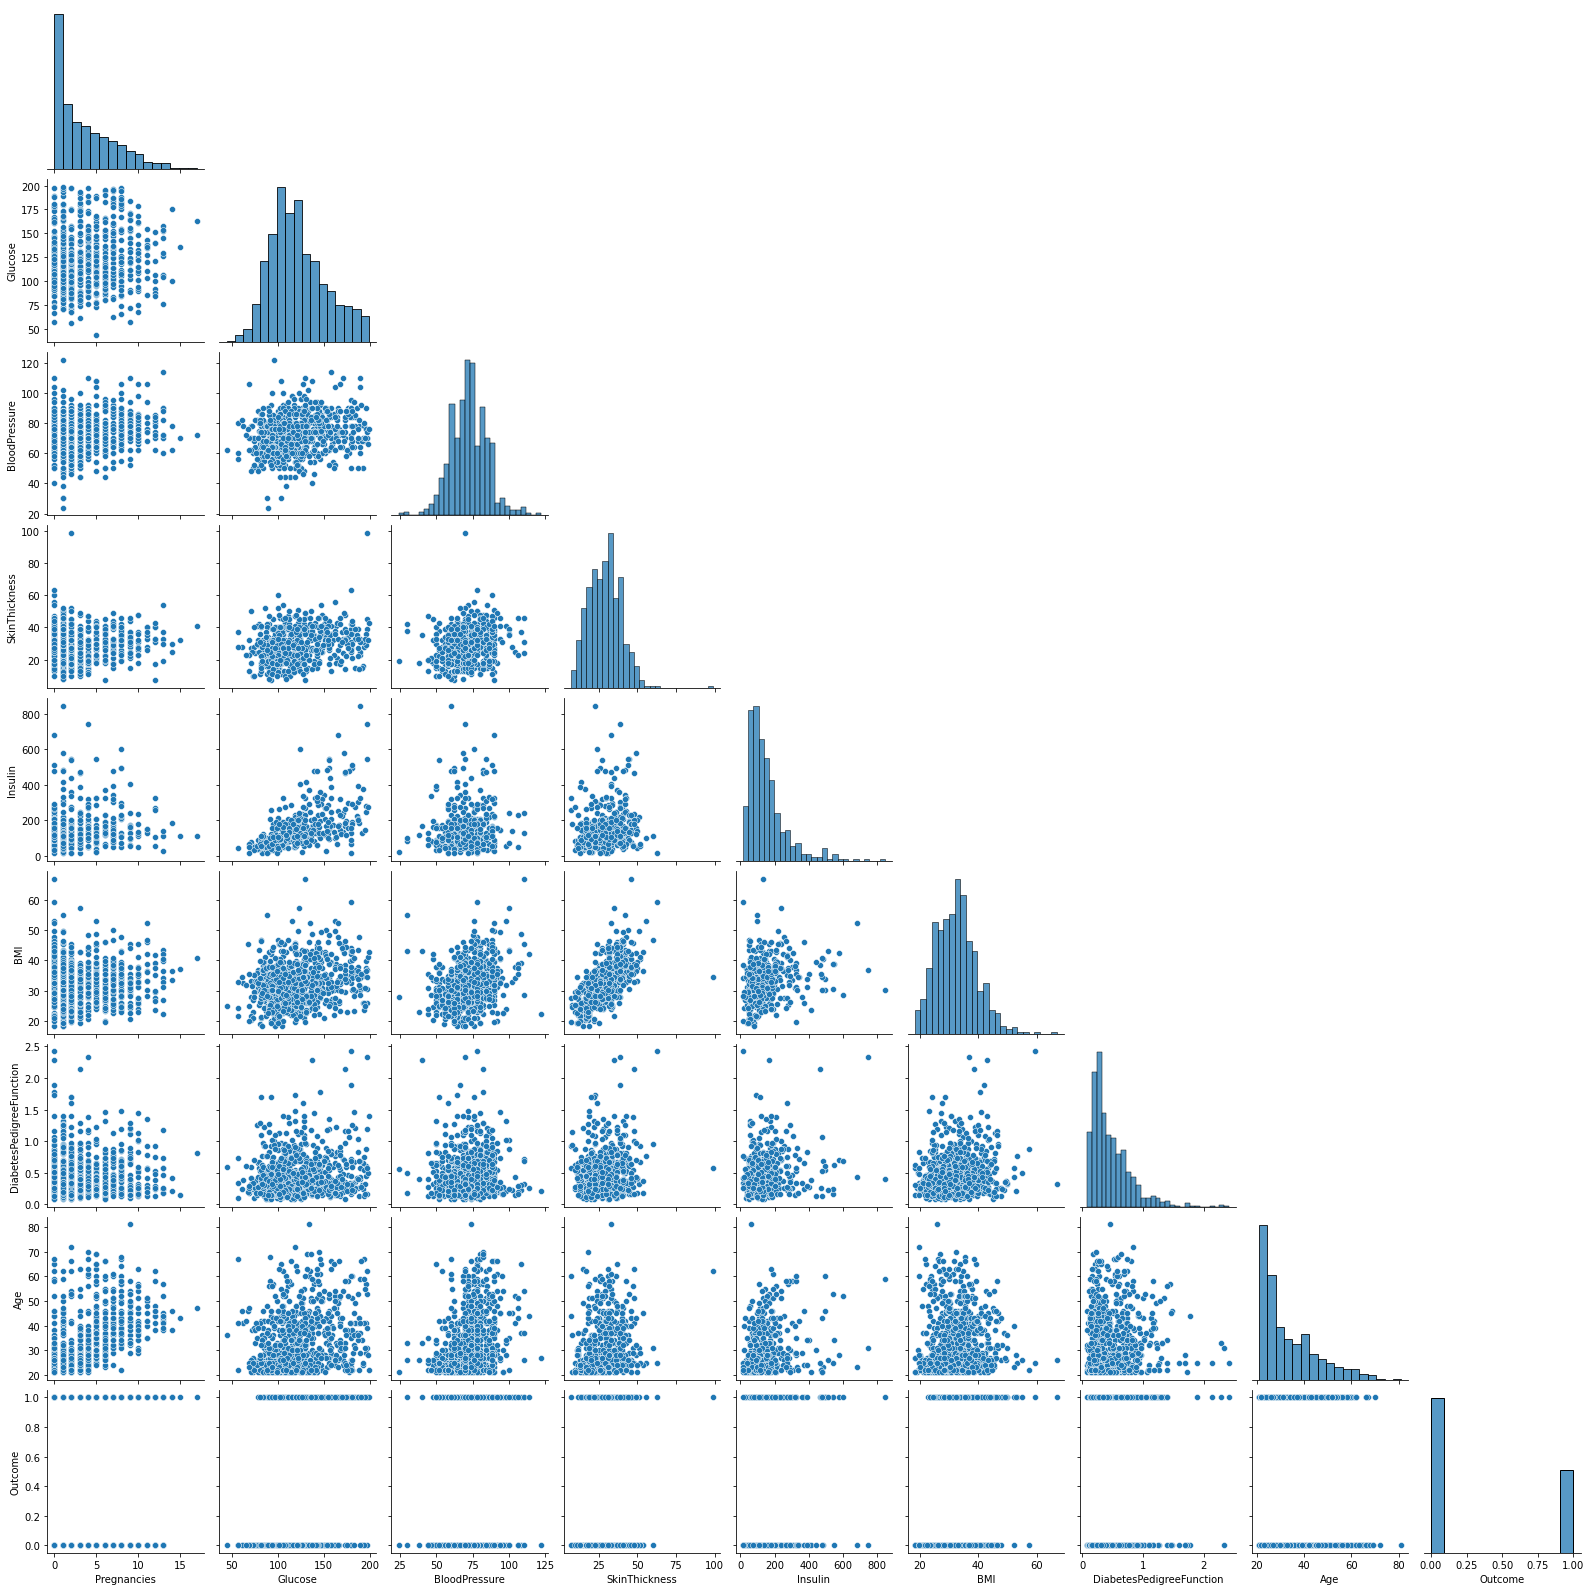

In [7]:
# Alternative plot with sns
# Corner will render half of plots as its identical copy but rotated
sns.pairplot(df1, corner=True);

## 2. Heatmaps and Correlation plots
Simply show correlation between variables. The data is identical between the diagonal line, can focus on upper or lower triangle.
* 1 represents total correlation, highly correlated
* 0 represents no correlation - they are completely in-dependent
* -1 represents total inverse correlation - move opposite to each other

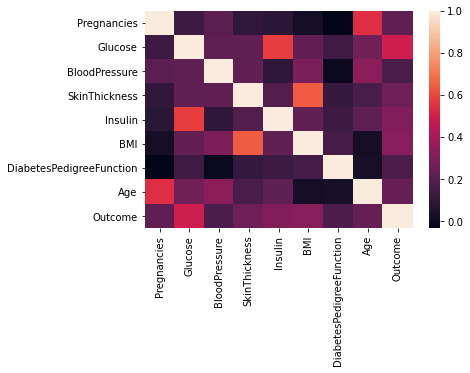

In [8]:
sns.heatmap(df1.corr());

Making a legible heatmap by annotate data, changing colour, annotation format and using 2 floating point.
* for list of colour palets, visit https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

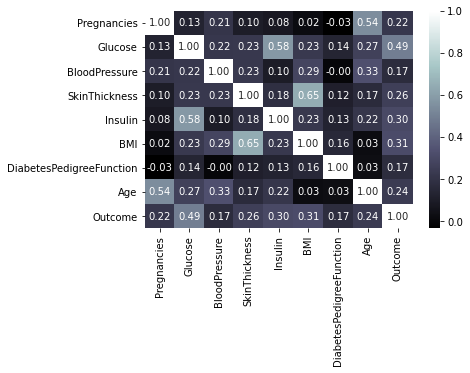

In [9]:
# Note: # you can easily look at the last column of the matrix and find correlation between dependent/independent vars
sns.heatmap(df1.corr(), annot=True, cmap='bone', fmt='0.2f');

### Aadvance visual correlation 1: Triangle correlation

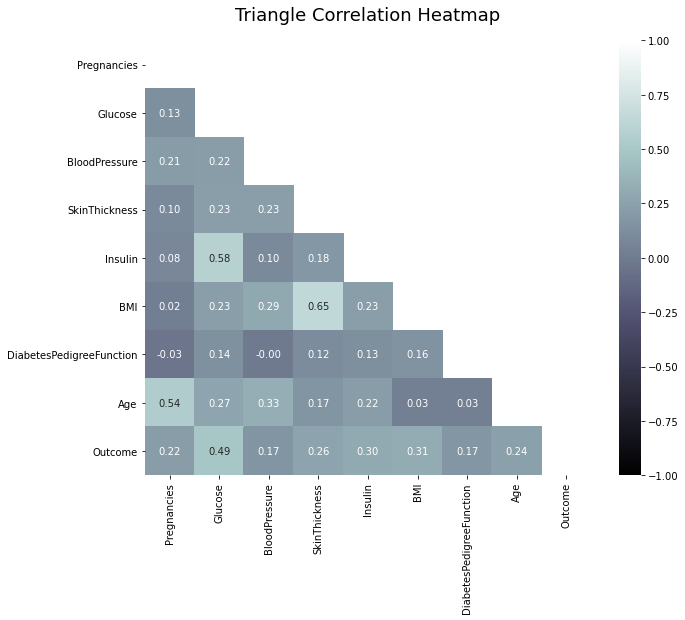

In [10]:
# define plot size
plt.figure(figsize=(10, 8))
# define the mask mato set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
# use vmin/max to define data spread for correlation -1 to 1
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bone', fmt='0.2f')
# title and change fontsize = padding
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=20);

### Advance visual correlation 2 - Independent with Dependent variable

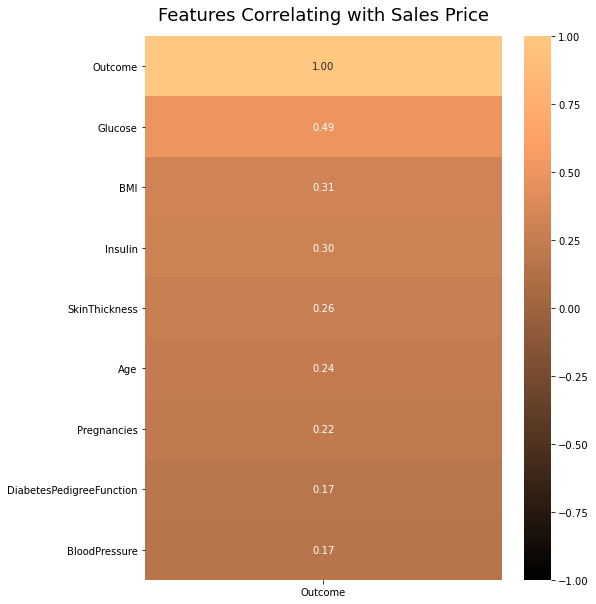

In [11]:
# setup figure size
plt.figure(figsize=(8, 10))
# set column correlation to target - in this case 'Outcome
heatmap = sns.heatmap(df1.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='copper', fmt='0.2f')
# title, font and padding
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## 3. 2D Histograms

In [12]:
# read in data and analyze
df2 = pd.read_csv('height_weight.csv')
df2.describe()

,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


Can view positive correlation between hight and weight. This relationship can be better viewed using a contour plot

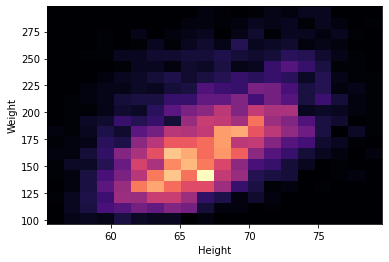

In [13]:
plt.hist2d(x=df2.height, y=df2.weight, bins=20, cmap='magma')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show();

## 4. Contour plots

In [14]:
# hist: count, or number of data points that fall into each bin
# x/y is the edges between the x and y bins
hist, x_edge, y_edge = np.histogram2d(x=df2.height, y=df2.weight, bins=20)

# mostly care about the center of the bins
# from first to end(not including)
# getting two edges and dividing them by 2
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

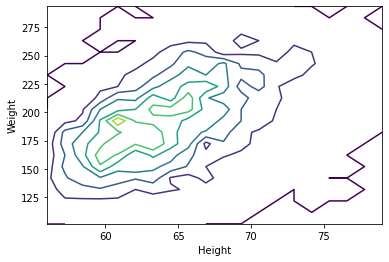

In [15]:
# can change smoothness based on data if we have alot od data, this can be done by level argument
# if you dont have extra data using KDE
plt.contour(x_center, y_center, hist)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show();

## 5. Kernal Density Estimation - KDE plots
KDE - allows us to estimate the probability density of the finite dataset

1. KDE - make a distribution for each dataset
2. once the distributions are added, you get a density distribution
3. this distribution can be based on, for example, gaussian distribution

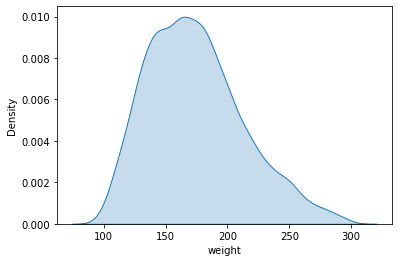

In [16]:
#This density can be viewed one-dimensionally 
sns.kdeplot(df2.weight, shade=True);

Check density of BIVARIATE density and look with histogram.
Can use bandwdith argument bw_mehod, to control kernel size.
* smaller bw = point format distribution
* larger bw = kernel overlap and smooth surface

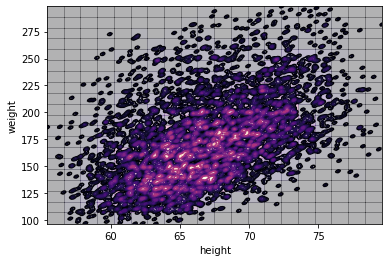

In [17]:
sns.kdeplot(x=df2.height, y=df2.weight, cmap='magma', bw_method=0.025)
plt.hist2d(x=df2.height, y=df2.weight, bins=20, cmap='magma', alpha=0.3);

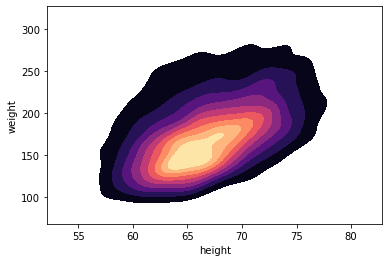

In [18]:
# making plot with shading
sns.kdeplot(x=df2.height, y=df2.weight, cmap='magma', shade=True);

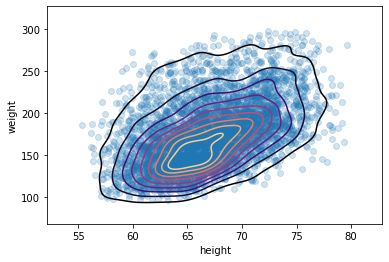

In [19]:
# can impose scatter and KDE for density estimation view
sns.kdeplot(x=df2.height, y=df2.weight, cmap='magma')
plt.scatter(x=df2.height, y=df2.weight, cmap='magma', alpha=0.2);

### Sample Plots    

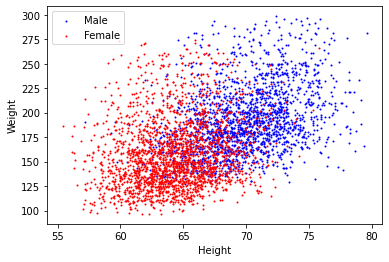

In [20]:
mask = df2['sex'] == 1
plt.scatter(x=df2.loc[mask, 'height'], y=df2.loc[mask, 'weight'], c='b', s=1, label='Male')
# ~ inverse
plt.scatter(x=df2.loc[~mask, 'height'], y=df2.loc[~mask, 'weight'], c='r', s=1, label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc=2);

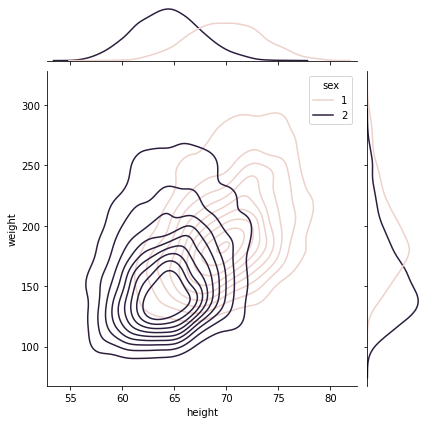

In [21]:
######Can view joint plot using density and distribution#####
sns.jointplot(data=df2, x='height', y='weight', hue='sex', kind='kde');